In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# for access to google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# # for unzip data
#!unzip '/gdrive/My Drive/proj2data/pics.zip' -d '/gdrive/My Drive/proj2data'

In [ ]:
import os
import cv2
cnt=0

X_house_images=np.zeros((15474,64,64,3),dtype='uint32')
for i in range(15474):

    sample=cv2.imread('/gdrive/My Drive/proj2data/pics/'+str(i)+'.jpg')
    imgs=cv2.resize(sample,(64,64))
    X_house_images[cnt]=imgs
    cnt+=1

print("No. of images: ",cnt)

No. of images:  15474


In [ ]:
X_house_images=X_house_images/255.0

In [ ]:
X_house_images

array([[[[0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ]],

        [[0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ]],

        [[0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         ...,
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ],
         [0.91764706, 0.93333333, 0.9372549 ]],

        ...,

        [[0.95294118, 0.96470588, 0.96862745],
         [0.9372549 , 0.94509804, 0.94901961]

In [ ]:
import pandas as pd

df = pd.read_csv('/gdrive/My Drive/Proj2_data/data2/desc.csv')
df.head(10)

,image_id,street,city,n_city,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
5,5,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000
7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000
8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000
9,9,2306 Lark Court,"Salton City, CA",317,4,5.1,3932,690000


In [ ]:
df['half_bath'] = df['bath'].apply(lambda x:(x%1)*10)
df.head(10)

,image_id,street,city,n_city,bed,bath,sqft,price,half_bath
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900,0.0
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500,0.0
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950,0.0
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000,0.0
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100,0.0
5,5,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000,0.0
6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000,0.0
7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,1.0
8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,1.0
9,9,2306 Lark Court,"Salton City, CA",317,4,5.1,3932,690000,1.0


In [ ]:
street = df['street'].values

In [ ]:
street_tag = []
for i in range(15474):
  street_tag.append (street[i].split()[0])

street_tag = np.array(street_tag)
type(street_tag)

numpy.ndarray

In [ ]:
street_tag = pd.DataFrame(street_tag)

In [ ]:
df = pd.concat([df, street_tag], axis = 1)

In [ ]:
df = df.rename(columns={0 : 'street_tag'})
df.head()

,image_id,street,city,n_city,bed,bath,sqft,price,half_bath,street_tag
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900,0.0,1317
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500,0.0,124
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950,0.0,2304
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000,0.0,755
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100,0.0,2207


In [ ]:
df.columns

Index(['image_id', 'street', 'city', 'n_city', 'bed', 'bath', 'sqft', 'price',
       'half_bath', 'street_tag'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   city      15474 non-null  object 
 3   n_city    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.2+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_dropped = df.drop(['street', 'city', 'street_tag' ], axis=1)

data_scaled = scaler.fit_transform(data_dropped)
data_scaled = pd.DataFrame(data_scaled, columns=data_dropped.columns.tolist())

y = data_scaled['price']
data_scaled = data_scaled.drop(['price' , 'image_id'], axis=1)

data_scaled.head(10)

,n_city,bed,bath,sqft,half_bath
0,0.765700,0.181818,0.055556,0.073618,0.00
1,0.115942,0.181818,0.055556,0.024904,0.00
2,0.367150,0.181818,0.027778,0.029907,0.00
3,0.115942,0.181818,0.027778,0.046126,0.00
4,0.132850,0.272727,0.083333,0.130385,0.00
5,0.115942,0.181818,0.027778,0.046126,0.00
6,0.132850,0.272727,0.083333,0.143153,0.00
7,0.115942,0.363636,0.058333,0.133433,0.25
8,0.115942,0.363636,0.058333,0.133433,0.25
9,0.765700,0.272727,0.141667,0.210042,0.25


In [ ]:
train = data_scaled

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 56)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(12379, 5)
(3095, 5)
(12379,)
(3095,)


In [ ]:
X_image_train, X_image_test = train_test_split(X_house_images, test_size = 0.2, random_state = 56)
print(X_image_train.shape)
print(X_image_test.shape)

(12379, 64, 64, 3)
(3095, 64, 64, 3)


In [ ]:
from tensorflow.keras.layers import Dense , Dropout ,Input , Average
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization

In [ ]:
input_model1 = Input((X_train.shape[1] ),name = 'input1_layer')
input_model2 = Input((X_image_train.shape[1] , X_image_train.shape[2] , X_image_train.shape[3] ),name = 'input2_layer')

#######################################################
#model1 ANN
model1 = Dense(1000 ,activation='relu' , name="layer1")(input_model1)
model1 = Dense(500 ,activation='relu' , name="layer2")(model1)
model1 = Dropout(0.2)(model1)
model1 = Dense(100 ,activation='relu' , name="layer3")(model1)
model1 = Dropout(0.2)(model1)
model1 = Dense(90 ,activation='sigmoid' , name="layer4")(model1)

#######################################################
#model2 CNN
model2 = Conv2D(32,(5,5), activation='relu',name = 'Conv2_1_5')(input_model2)
model2 = BatchNormalization(name = 'Bnorm2_1')(model2)
model2 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_2_5')(model2)
model2 = BatchNormalization(name = 'Bnorm2_2')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool2_1')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv2_3_3')(model2)
model2 = BatchNormalization(name = 'Bnorm2_3')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool2_2')(model2)
model2 = Conv2D(64,(2,2), activation='relu' ,padding='valid',name = 'Conv2_4_3')(model2)
model2 = BatchNormalization(name = 'Bnorm2_4')(model2)
model2 = AveragePooling2D((2, 2),name = 'AvgPool2_1')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv2_5_1')(model2)
model2 = BatchNormalization(name = 'Bnorm2_5')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool2_3')(model2)
model2 = Flatten(name = 'Flatten1')(model2)
#######################################################
merged = Concatenate()([model1, model2])

# neural network
merged = Dense(units = 5000, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = BatchNormalization()(merged)
merged = Dense(units =4000, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 4500, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 3500, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 2000, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 1000, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 500, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = Dense(units = 200, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 50, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 10, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
output = Dense(units = 1, activation = 'sigmoid')(merged)

model = Model(inputs= [input_model1,input_model2], outputs=[output])
model.summary()

Model: "functional_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input2_layer (InputLayer)       [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv2_1_5 (Conv2D)              (None, 60, 60, 32)   2432        input2_layer[0][0]               
__________________________________________________________________________________________________
Bnorm2_1 (BatchNormalization)   (None, 60, 60, 32)   128         Conv2_1_5[0][0]                  
__________________________________________________________________________________________________
Conv2_2_5 (Conv2D)              (None, 60, 60, 32)   25632       Bnorm2_1[0][0]                   
______________________________________________________________________________________

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1 , patience=3)
model.compile(optimizer='sgd',loss='mse',
  metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(x = [X_train,X_image_train], y=y_train,
                              batch_size = 32,
                              epochs= 50,
                              validation_split = 0.2,
                              verbose=1,
                              callbacks=[es])

Epoch 1/50
310/310 [==============================] - 7s 24ms/step - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 2/50
310/310 [==============================] - 7s 23ms/step - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 3/50
310/310 [==============================] - 7s 23ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 4/50
310/310 [==============================] - 7s 23ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 5/50
310/310 [==============================] - 7s 23ms/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 6/50
310/310 [==============================] - 7s 23ms/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 7/50
310/310 [==

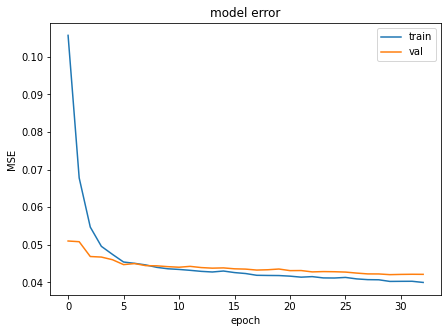

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
test_price = y_test.values

In [ ]:
#test_price.shape
test_price  = test_price .reshape(-1,1)

In [ ]:
test_price.shape

(3095, 1)

In [ ]:
test_price = test_price.astype('float32')

In [ ]:
predicted_price = model.predict([X_test , X_image_test])

In [ ]:
predicted_price[5]

array([0.23083468], dtype=float32)

In [ ]:
sum = 0
mid = 0
for i in range (3095):
    sum = (abs(test_price[i] -predicted_price[i])) + sum

mid = sum / 3095

In [ ]:
print (mid*2000000)

[297650.8140564]


In [ ]:
model.save_weights("/gdrive/My Drive/network_best_weights_house.h5")
model.save("/gdrive/My Drive/network_best_house.hdf5")

## Neural Network Only(without pictures)

In [ ]:
input_layer = Input((X_train.shape[1] ),name = 'input1_layer')

input_layer = Input(shape=X_train.shape[1], name ="input")
hidden_layer1 = Dense(500 ,activation='relu' , name="layer1")(input_layer)
hidden_layer2 = Dense(250 ,activation='relu' , name="layer2")(hidden_layer1)
droupout_layer = Dropout(0.2)(hidden_layer2)
output_layer = Dense(1 ,activation='sigmoid' , name="layer3")(droupout_layer)

model = Model(inputs=input_layer, outputs=output_layer , name = "model1")


In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd , loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=2)

In [ ]:
history = model.fit(X_train,y_train , batch_size=250,epochs=100, verbose=1 , validation_split=0.2 ,callbacks = [es])

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 7/100
40/40 [===============

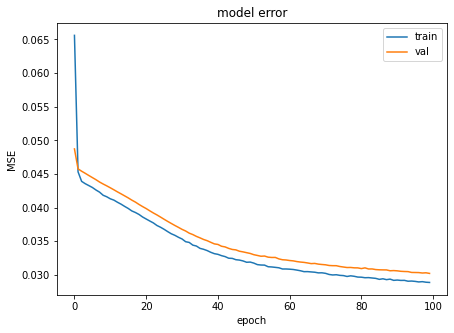

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
predicted_price = model.predict(X_test)

In [ ]:
sum = 0
mid = 0

for i in range (3095):
    sum = (abs(test_price[i] - predicted_price[i])) + sum

mid = sum / 3095
print (mid*2000000)

[252319.18692589]
